In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_objects import Fluorophore
from imaging_model import fast_form_A, fast_form_A_from_photons
from information_matrix import read_qe, fast_form_q_vec, FIM, FIM_poisson

In [2]:
fluorophore_string_list = ["mEmerald", "mTagBFP2", "mCherry", "mNeptune2.5"]
brightness_list         = [39.1,       32.38,      15.85,     22.8         ]
wavelength_range = (400,900)

fluorophore_list = []
for fluorophore_name, fluorophore_brightness in zip(fluorophore_string_list, brightness_list):
    fluorophore_list.append(Fluorophore(fluorophore_name, fluorophore_brightness, index_range=wavelength_range))

list(map(Fluorophore.get_name, fluorophore_list))

['mEmerald', 'mTagBFP2', 'mCherry', 'mNeptune2.5']

In [3]:
illumination_wavelengths = np.array([405, 488, 561, 637])
bin_width = 10
x = [1,1,1,1]

params_wo_k = (illumination_wavelengths, wavelength_range, bin_width, fluorophore_list)

In [4]:
qe = read_qe(wavelength_range)
q_vec = fast_form_q_vec(qe, wavelength_range, bin_width, len(illumination_wavelengths))
q_vec = np.ones(q_vec.shape)

def calc_FOM(A, x, variance=2, normal_approximation=True):
    if normal_approximation:
        F = FIM(A, x, q_vec, variance)
    else:
        F = FIM_poisson(A, x)
    FIM_inv = np.linalg.inv(F)
    CRLB = np.diagonal(FIM_inv)
    FOM_list = np.array(x) / np.sqrt(CRLB)
    
    return FOM_list

In [5]:
def FOM_from_desired_photons(desired_photons, variance=2, normal_approximation=True):
    A = fast_form_A_from_photons(desired_photons, *params_wo_k)
    return calc_FOM(A, x, variance=variance, normal_approximation=normal_approximation)
    

In [6]:
FOM_from_desired_photons(100, variance=2)

array([9.08452378, 7.71780461, 3.82459995, 8.93362015])

In [7]:
FOM_from_desired_photons(100, variance=1e-9)

array([10.94890689,  8.71414327,  4.69662789, 11.4950197 ])

In [8]:
fast_form_A_from_photons(1000, *params_wo_k).sum(axis=1).reshape((4,50)).sum(axis=1)

array([1000., 1000., 1000., 1000.])

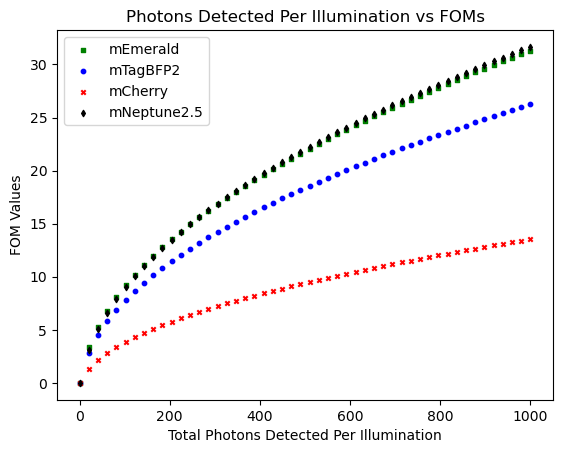

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

X = np.linspace(0.01,1000,50)
Y = {}
for fluorophore in fluorophore_list:
    Y[fluorophore] = []
for desired_photons in X:
    A = fast_form_A_from_photons(desired_photons, *params_wo_k)
    figures_of_merit = calc_FOM(A,x)
    for j in range(len(fluorophore_list)):
        Y[fluorophore_list[j]].append(figures_of_merit[j])


color = {
    'mEmerald'    : 'g',
    'mTagBFP2'    : 'b',
    'mCherry'     : 'r',
    'mNeptune2.5' : 'black'
}
marker = {
    'mEmerald'    : 's',
    'mTagBFP2'    : 'o',
    'mCherry'     : 'x',
    'mNeptune2.5' : 'd'
}

for fluorophore in fluorophore_list:
    ax.scatter(X, Y[fluorophore], s=10, c=color[fluorophore.name], marker=marker[fluorophore.name], label=fluorophore.name)


    
""" 
Y2 = {}
for fluorophore in fluorophore_list:
    Y2[fluorophore] = []
for desired_photons in X:
    A = fast_form_A_from_photons(desired_photons, *params_wo_k)
    figures_of_merit = calc_FOM(A, x, variance=1e-9)
    for j in range(len(fluorophore_list)):
        Y2[fluorophore_list[j]].append(figures_of_merit[j])


color = {
    'mEmerald'    : 'g',
    'mTagBFP2'    : 'b',
    'mCherry'     : 'r',
    'mNeptune2.5' : 'black'
}
marker = {
    'mEmerald'    : 's',
    'mTagBFP2'    : 'o',
    'mCherry'     : 'x',
    'mNeptune2.5' : 'd'
}

for fluorophore in fluorophore_list:
    ax.scatter(X, Y2[fluorophore], s=10, c=color[fluorophore.name], marker=marker[fluorophore.name]) #, label=fluorophore.name)
    
"""
    

plt.legend(loc='upper left')
plt.ylabel('FOM Values')
plt.xlabel('Total Photons Detected Per Illumination')
plt.title('Photons Detected Per Illumination vs FOMs')
plt.show()

## Same graph with no electronic read noise (variance):

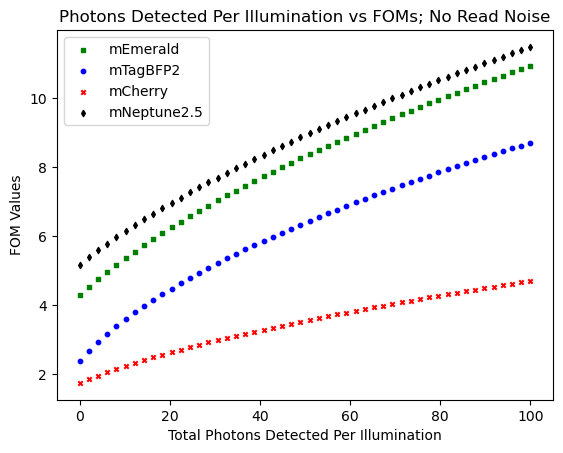

In [10]:
fig_0 = plt.figure()
ax = fig_0.add_subplot(111)

X = np.linspace(0.01,100,50)
Y = {}
for fluorophore in fluorophore_list:
    Y[fluorophore] = []
for desired_photons in X:
    A = fast_form_A_from_photons(desired_photons, *params_wo_k)
    figures_of_merit = calc_FOM(A, x, variance=1e-9)
    for j in range(len(fluorophore_list)):
        Y[fluorophore_list[j]].append(figures_of_merit[j])


color = {
    'mEmerald'    : 'g',
    'mTagBFP2'    : 'b',
    'mCherry'     : 'r',
    'mNeptune2.5' : 'black'
}
marker = {
    'mEmerald'    : 's',
    'mTagBFP2'    : 'o',
    'mCherry'     : 'x',
    'mNeptune2.5' : 'd'
}

for fluorophore in fluorophore_list:
    ax.scatter(X, Y[fluorophore], s=10, c=color[fluorophore.name], marker=marker[fluorophore.name], label=fluorophore.name)

plt.legend(loc='upper left')
plt.ylabel('FOM Values')
plt.xlabel('Total Photons Detected Per Illumination')
plt.title('Photons Detected Per Illumination vs FOMs; No Read Noise')
plt.show()

In [11]:
#fig.savefig('photons vs FOM with read noise.png')
#fig_0.savefig('photons vs FOM without read noise.png'#

## Effect of read noise on FOM:

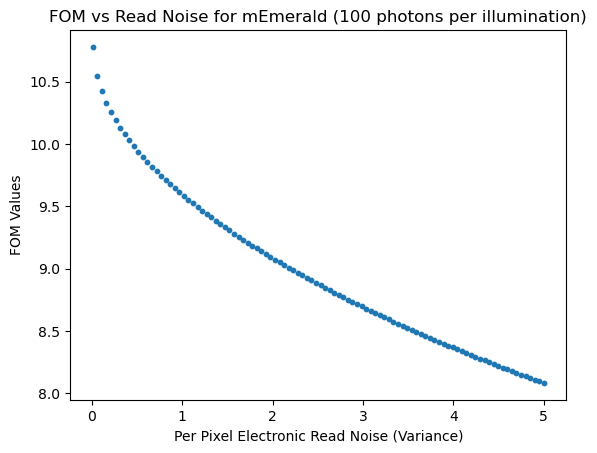

In [12]:
photons = 100
fluorophore_index = 0
X = np.linspace(0.01, 5, 100)

Y = []
for variance in X:
    figures_of_merit = FOM_from_desired_photons(photons, variance=variance)
    Y.append(figures_of_merit[fluorophore_index])

fig_1 = plt.figure()
ax = fig_1.add_subplot(111)
ax.scatter(X, Y, s=10)

plt.ylabel('FOM Values')
plt.xlabel('Per Pixel Electronic Read Noise (Variance)')
plt.title('FOM vs Read Noise for ' + fluorophore_string_list[fluorophore_index] + " (" + str(photons) + " photons per illumination)" )

plt.show()

## Poisson with no read noise vs Normal Approx. with no read noise

In [ ]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)

# poisson approx
X = np.linspace(0.01,1000,50)
Y = {}
for fluorophore in fluorophore_list:
    Y[fluorophore] = []
for desired_photons in X:
    A = fast_form_A_from_photons(desired_photons, *params_wo_k)
    figures_of_merit = calc_FOM(A, x, normal_approximation=False)
    for j in range(len(fluorophore_list)):
        Y[fluorophore_list[j]].append(figures_of_merit[j])


color = {
    'mEmerald'    : 'g',
    'mTagBFP2'    : 'b',
    'mCherry'     : 'r',
    'mNeptune2.5' : 'black'
}
marker = {
    'mEmerald'    : 's',
    'mTagBFP2'    : 'o',
    'mCherry'     : 'x',
    'mNeptune2.5' : 'd'
}

for fluorophore in fluorophore_list:
    ax.scatter(X, Y[fluorophore], s=15, c=color[fluorophore.name], marker=marker[fluorophore.name], label=fluorophore.name)


    
# normal approx
Y2 = {}
for fluorophore in fluorophore_list:
    Y2[fluorophore] = []
for desired_photons in X:
    A = fast_form_A_from_photons(desired_photons, *params_wo_k)
    figures_of_merit = calc_FOM(A, x, variance=1e-15)
    for j in range(len(fluorophore_list)):
        Y2[fluorophore_list[j]].append(figures_of_merit[j])


color = {
    'mEmerald'    : 'g',
    'mTagBFP2'    : 'b',
    'mCherry'     : 'r',
    'mNeptune2.5' : 'black'
}
marker = {
    'mEmerald'    : 's',
    'mTagBFP2'    : 'o',
    'mCherry'     : 'x',
    'mNeptune2.5' : 'd'
}

for fluorophore in fluorophore_list:
    ax.scatter(X, Y2[fluorophore], s=10, c=color[fluorophore.name], marker=marker[fluorophore.name]) #, label=fluorophore.name)
    
    
    

plt.legend(loc='upper left')
plt.ylabel('FOM Values')
plt.xlabel('Total Photons Detected Per Illumination')
plt.title('Photons Detected Per Illumination vs FOMs')
plt.show()

#fig1.savefig('poisson vs normal approx.png', dpi=300)

C:\Users\buffs\Documents\GitHub\hyperspectral\information_matrix.py:59: RuntimeWarning: divide by zero encountered in divide
  y_inv = 1 / y
C:\Users\buffs\Documents\GitHub\hyperspectral\information_matrix.py:59: RuntimeWarning: divide by zero encountered in divide
  y_inv = 1 / y
C:\Users\buffs\Documents\GitHub\hyperspectral\information_matrix.py:59: RuntimeWarning: divide by zero encountered in divide
  y_inv = 1 / y
C:\Users\buffs\Documents\GitHub\hyperspectral\information_matrix.py:59: RuntimeWarning: divide by zero encountered in divide
  y_inv = 1 / y
C:\Users\buffs\Documents\GitHub\hyperspectral\information_matrix.py:59: RuntimeWarning: divide by zero encountered in divide
  y_inv = 1 / y
C:\Users\buffs\Documents\GitHub\hyperspectral\information_matrix.py:59: RuntimeWarning: divide by zero encountered in divide
  y_inv = 1 / y
C:\Users\buffs\Documents\GitHub\hyperspectral\information_matrix.py:59: RuntimeWarning: divide by zero encountered in divide
  y_inv = 1 / y
C:\Users\buff